In [117]:
import collections
import random

import matplotlib.pyplot as plt
import numpy as np
import tqdm
import matminer
import pymatgen.core, pymatgen.core.composition
import pymatgen.io.ase

import pandas as pd

In [124]:
RANDOM_SEED = 1234

pd.options.mode.chained_assignment = None
tqdm.tqdm.pandas()
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [2]:
df = pd.read_pickle("../DigitalEcosystem/raw_data/2d_mat_dataset_raw.pkl")
df = df.drop(columns=['2dm_id (unitless)',
                      'formula',
                      'discovery_process (unitless)',
                      'potcars (unitless)',
                      'is_hubbard (unitless)',
                      'energy_per_atom (eV)',
                      'decomposition_energy (eV/atom)',
                      'is_bandgap_direct (unitless)',
                      'is_metal (unitless)',
                      'energy_vdw_per_atom (eV/atom)'])
df

,atoms_object (unitless),exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,...,min:num_s_valence,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability
0,"(Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('F...",0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,...,2.0,2.0,0.133,0.02770,147.0,146.0,171.0,284.0,2826.915883,0.557
1,"(Atom('Ba', [2.476683476681, 1.429910903420999...",0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,...,2.0,5.0,0.192,18.00000,206.0,247.0,252.0,370.3,1620.000000,6.600
2,"(Atom('Tl', [2.63896615613751, 10.292177253854...",0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,...,2.0,3.0,0.128,0.20500,180.0,189.0,215.0,403.5,818.000000,2.900
3,"(Atom('Mo', [1.5833675, 2.687975714894, 2.6388...",-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,...,1.0,3.0,0.251,0.00890,175.0,182.0,207.0,305.2,206.000000,2.180
4,"(Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('O...",NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,...,2.0,2.0,0.133,0.02658,152.0,150.0,182.0,284.0,317.500000,0.802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,"(Atom('Bi', [6.537243774895211, 2.363799214670...",NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,...,2.0,5.0,0.124,3.00000,206.0,199.0,244.0,437.0,1790.000000,5.500
6347,"(Atom('Pt', [1.7596322562971602, 1.01592211741...",0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,...,1.0,3.0,0.133,0.20500,180.0,189.0,215.0,275.4,2680.000000,2.900
6348,"(Atom('Pt', [1.84215348881831, 1.0635655531000...",0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,...,1.0,4.0,0.133,0.52000,190.0,182.0,229.0,275.4,2680.000000,3.770
6349,"(Atom('Pt', [1.8200943700922698, 1.05082975916...",0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,...,1.0,3.0,0.133,0.20500,180.0,189.0,215.0,275.4,2680.000000,2.900


In [3]:
structures = df['atoms_object (unitless)'].apply(pymatgen.io.ase.AseAtomsAdaptor.get_structure)
df['ox_struct'] = structures.apply(lambda i: i.copy())
df.ox_struct.progress_apply(lambda struct: struct.add_oxidation_state_by_guess())
df

100%|██████████| 6351/6351 [04:53<00:00, 21.60it/s]  


,atoms_object (unitless),exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,...,min:period,min:specific_heat,min:thermal_conductivity,min:vdw_radius,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability,ox_struct
0,"(Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('F...",0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,...,2.0,0.133,0.02770,147.0,146.0,171.0,284.0,2826.915883,0.557,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22...."
1,"(Atom('Ba', [2.476683476681, 1.429910903420999...",0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,...,5.0,0.192,18.00000,206.0,247.0,252.0,370.3,1620.000000,6.600,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [..."
2,"(Atom('Tl', [2.63896615613751, 10.292177253854...",0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,...,3.0,0.128,0.20500,180.0,189.0,215.0,403.5,818.000000,2.900,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [..."
3,"(Atom('Mo', [1.5833675, 2.687975714894, 2.6388...",-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,...,3.0,0.251,0.00890,175.0,182.0,207.0,305.2,206.000000,2.180,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0...."
4,"(Atom('Ir', [0.0, 0.0, 0.0], index=0), Atom('O...",NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,...,2.0,0.133,0.02658,152.0,150.0,182.0,284.0,317.500000,0.802,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,"(Atom('Bi', [6.537243774895211, 2.363799214670...",NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,...,5.0,0.124,3.00000,206.0,199.0,244.0,437.0,1790.000000,5.500,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [..."
6347,"(Atom('Pt', [1.7596322562971602, 1.01592211741...",0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,...,3.0,0.133,0.20500,180.0,189.0,215.0,275.4,2680.000000,2.900,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [..."
6348,"(Atom('Pt', [1.84215348881831, 1.0635655531000...",0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,...,4.0,0.133,0.52000,190.0,182.0,229.0,275.4,2680.000000,3.770,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [..."
6349,"(Atom('Pt', [1.8200943700922698, 1.05082975916...",0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,...,3.0,0.133,0.20500,180.0,189.0,215.0,275.4,2680.000000,2.900,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [..."


In [4]:
df = df.drop(columns=['atoms_object (unitless)'])

In [5]:
from matminer.featurizers.base import MultipleFeaturizer
from matminer.featurizers.structure.misc import EwaldEnergy
from matminer.featurizers.structure.order import StructuralComplexity
from matminer.featurizers.structure.symmetry import GlobalSymmetryFeatures

struct_features = MultipleFeaturizer([
    EwaldEnergy(),
    StructuralComplexity(),
    GlobalSymmetryFeatures('n_symmetry_ops'),
])
df[struct_features.feature_labels()] = struct_features.featurize_many(df.ox_struct)
df

MultipleFeaturizer:   0%|          | 0/6351 [00:00<?, ?it/s]

,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,min:vdw_radius_alvarez,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability,ox_struct,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,146.0,171.0,284.0,2826.915883,0.557,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22....",0.000000,0.918296,2.754888,12
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,247.0,252.0,370.3,1620.000000,6.600,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [...",0.000000,0.918296,2.754888,12
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,189.0,215.0,403.5,818.000000,2.900,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [...",-13.279759,2.584963,31.019550,2
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,182.0,207.0,305.2,206.000000,2.180,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0....",-6.915170,0.918296,5.509775,8
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,150.0,182.0,284.0,317.500000,0.802,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091...",-44.382832,0.918296,2.754888,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,199.0,244.0,437.0,1790.000000,5.500,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [...",-12.929181,1.000000,8.000000,4
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,189.0,215.0,275.4,2680.000000,2.900,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [...",-13.435306,1.000000,4.000000,12
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,182.0,229.0,275.4,2680.000000,3.770,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [...",-12.442977,1.000000,4.000000,12
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,189.0,215.0,275.4,2680.000000,2.900,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [...",-14.872506,1.000000,4.000000,12


In [6]:
import warnings
from matminer.featurizers.structure.bonding import GlobalInstabilityIndex
desc = GlobalInstabilityIndex()

def maybe_global_instability(struct):
    try:
        return desc.featurize(struct)[0]
    except:
        return None

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    df['global_instability']=df.ox_struct.progress_apply(maybe_global_instability)
df

100%|██████████| 6351/6351 [01:59<00:00, 53.18it/s] 


,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,min:vdw_radius_mm3,min:vdw_radius_uff,min:sound_velocity,min:Polarizability,ox_struct,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,171.0,284.0,2826.915883,0.557,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22....",0.000000,0.918296,2.754888,12,0.000000
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,252.0,370.3,1620.000000,6.600,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [...",0.000000,0.918296,2.754888,12,0.000000
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,215.0,403.5,818.000000,2.900,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [...",-13.279759,2.584963,31.019550,2,0.828075
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,207.0,305.2,206.000000,2.180,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0....",-6.915170,0.918296,5.509775,8,0.101580
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,182.0,284.0,317.500000,0.802,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091...",-44.382832,0.918296,2.754888,12,0.202284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,244.0,437.0,1790.000000,5.500,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [...",-12.929181,1.000000,8.000000,4,0.195663
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,215.0,275.4,2680.000000,2.900,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [...",-13.435306,1.000000,4.000000,12,0.050539
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,229.0,275.4,2680.000000,3.770,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [...",-12.442977,1.000000,4.000000,12,0.484046
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,215.0,275.4,2680.000000,2.900,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [...",-14.872506,1.000000,4.000000,12,0.062393


In [7]:
from pymatgen.analysis.local_env import JmolNN
neighbor_finder = JmolNN()

In [8]:
from matminer.featurizers.site.bonding import AverageBondLength

def average_bond_length(structure, featurizer = AverageBondLength(neighbor_finder)):
    n_atoms = len(structure)
    try:
        lengths = map(lambda i: featurizer.featurize(structure, i)[0], range(n_atoms))
        return sum(lengths) / n_atoms
    except IndexError:
        return None

df['bond_length_average'] = df.ox_struct.progress_apply(average_bond_length).copy()
df

100%|██████████| 6351/6351 [02:34<00:00, 41.22it/s] 


,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,min:vdw_radius_uff,min:sound_velocity,min:Polarizability,ox_struct,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability,bond_length_average
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,284.0,2826.915883,0.557,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22....",0.000000,0.918296,2.754888,12,0.000000,2.172645
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,370.3,1620.000000,6.600,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [...",0.000000,0.918296,2.754888,12,0.000000,NaN
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,403.5,818.000000,2.900,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [...",-13.279759,2.584963,31.019550,2,0.828075,2.680073
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,305.2,206.000000,2.180,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0....",-6.915170,0.918296,5.509775,8,0.101580,2.603095
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,284.0,317.500000,0.802,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091...",-44.382832,0.918296,2.754888,12,0.202284,2.033082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,437.0,1790.000000,5.500,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [...",-12.929181,1.000000,8.000000,4,0.195663,2.944214
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,275.4,2680.000000,2.900,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [...",-13.435306,1.000000,4.000000,12,0.050539,2.448267
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,275.4,2680.000000,3.770,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [...",-12.442977,1.000000,4.000000,12,0.484046,2.643143
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,275.4,2680.000000,2.900,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [...",-14.872506,1.000000,4.000000,12,0.062393,2.427265


In [9]:
from matminer.featurizers.site.bonding import AverageBondAngle
def average_bond_angle(structure, featurizer = AverageBondAngle(neighbor_finder)):
    n_atoms = len(structure)
    try:
        angles = map(lambda i: featurizer.featurize(structure, i)[0], range(n_atoms))
        return sum(angles) / n_atoms
    except IndexError:
        return None
df['bond_angle_average'] = df.ox_struct.progress_apply(average_bond_angle).copy()
df

  0%|          | 0/6351 [00:00<?, ?it/s]/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/matminer/featurizers/site/bonding.py:250: RuntimeWarning: All-NaN slice encountered
  minimum_bond_angles = np.nanmin(bond_angles, axis=1)
100%|██████████| 6351/6351 [02:49<00:00, 37.37it/s] 


,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,min:sound_velocity,min:Polarizability,ox_struct,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability,bond_length_average,bond_angle_average
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,2826.915883,0.557,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22....",0.000000,0.918296,2.754888,12,0.000000,2.172645,1.676525
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,1620.000000,6.600,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [...",0.000000,0.918296,2.754888,12,0.000000,NaN,NaN
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,818.000000,2.900,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [...",-13.279759,2.584963,31.019550,2,0.828075,2.680073,1.711958
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,206.000000,2.180,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0....",-6.915170,0.918296,5.509775,8,0.101580,2.603095,1.206967
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,317.500000,0.802,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091...",-44.382832,0.918296,2.754888,12,0.202284,2.033082,1.639460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,1790.000000,5.500,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [...",-12.929181,1.000000,8.000000,4,0.195663,2.944214,1.585055
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,2680.000000,2.900,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [...",-13.435306,1.000000,4.000000,12,0.050539,2.448267,1.498703
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,2680.000000,3.770,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [...",-12.442977,1.000000,4.000000,12,0.484046,2.643143,1.031791
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,2680.000000,2.900,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [...",-14.872506,1.000000,4.000000,12,0.062393,2.427265,1.633722


In [10]:
def average_cn(structure, neighbor_finder = neighbor_finder):
    n_atoms = len(structure)
    cns = map(lambda i: neighbor_finder.get_cn(structure, i), range(n_atoms))
    return sum(cns) / n_atoms
df['average_cn'] = df.ox_struct.progress_apply(average_cn).copy()
df

100%|██████████| 6351/6351 [02:56<00:00, 35.95it/s] 


,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,min:Polarizability,ox_struct,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability,bond_length_average,bond_angle_average,average_cn
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,0.557,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22....",0.000000,0.918296,2.754888,12,0.000000,2.172645,1.676525,4.0
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,6.600,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [...",0.000000,0.918296,2.754888,12,0.000000,NaN,NaN,0.0
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,2.900,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [...",-13.279759,2.584963,31.019550,2,0.828075,2.680073,1.711958,3.5
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,2.180,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0....",-6.915170,0.918296,5.509775,8,0.101580,2.603095,1.206967,6.0
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,0.802,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091...",-44.382832,0.918296,2.754888,12,0.202284,2.033082,1.639460,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,5.500,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [...",-12.929181,1.000000,8.000000,4,0.195663,2.944214,1.585055,2.5
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,2.900,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [...",-13.435306,1.000000,4.000000,12,0.050539,2.448267,1.498703,4.5
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,3.770,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [...",-12.442977,1.000000,4.000000,12,0.484046,2.643143,1.031791,5.5
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,2.900,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [...",-14.872506,1.000000,4.000000,12,0.062393,2.427265,1.633722,4.5


In [11]:
def ab_perimeter_area_ratio(structure):
    a, b, c = structure.lattice.matrix
    perimeter = 2*np.linalg.norm(a) + 2*np.linalg.norm(b)
    area = np.linalg.norm(np.cross(a,b))
    return perimeter / area
df['perimeter_area_ratio'] = df.ox_struct.progress_apply(ab_perimeter_area_ratio).copy()
df

100%|██████████| 6351/6351 [00:00<00:00, 15461.33it/s]


,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,ox_struct,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability,bond_length_average,bond_angle_average,average_cn,perimeter_area_ratio
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,"[[0. 0. 0.] Ir0+, [ 1.75964097 1.01592735 22....",0.000000,0.918296,2.754888,12,0.000000,2.172645,1.676525,4.0,1.312429
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,"[[ 2.47668348 1.4299109 19.09028155] Ba0+, [...",0.000000,0.918296,2.754888,12,0.000000,NaN,NaN,0.0,0.932458
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,"[[ 2.63896616 10.29217725 11.08346956] Tl2+, [...",-13.279759,2.584963,31.019550,2,0.828075,2.680073,1.711958,3.5,0.668855
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,"[[1.5833675 2.68797571 2.63881737] Mo2+, [ 0....",-6.915170,0.918296,5.509775,8,0.101580,2.603095,1.206967,6.0,0.996401
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,"[[0. 0. 0.] Ir4+, [-1.24446100e-06 1.82188091...",-44.382832,0.918296,2.754888,12,0.202284,2.033082,1.639460,4.0,1.463689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,"[[ 6.53724377 2.36379921 10.57502831] Bi2+, [...",-12.929181,1.000000,8.000000,4,0.195663,2.944214,1.585055,2.5,0.507262
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,"[[ 1.75963226 1.01592212 21.08758921] Pt2+, [...",-13.435306,1.000000,4.000000,12,0.050539,2.448267,1.498703,4.5,1.312435
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,"[[ 1.84215349 1.06356555 21.02069095] Pt2+, [...",-12.442977,1.000000,4.000000,12,0.484046,2.643143,1.031791,5.5,1.253643
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,"[[ 1.82009437 1.05082976 20.73570262] Pt2+, [...",-14.872506,1.000000,4.000000,12,0.062393,2.427265,1.633722,4.5,1.268837


In [12]:
def slab_thickness(structure):
    c_coords = structure.cart_coords[:,2]
    thickness = max(c_coords) - min(c_coords)
    return thickness
df['slab_thickness'] = df.ox_struct.progress_apply(slab_thickness).copy()
df

100%|██████████| 6351/6351 [00:00<00:00, 73026.91it/s]


,exfoliation_energy_per_atom (eV/atom),total_magnetization (Bohr Magneton),bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,...,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability,bond_length_average,bond_angle_average,average_cn,perimeter_area_ratio,slab_thickness
0,0.234617,2.487400e-01,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,...,0.000000,0.918296,2.754888,12,0.000000,2.172645,1.676525,4.0,1.312429,22.088712
1,0.210645,7.488541e-01,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,...,0.000000,0.918296,2.754888,12,0.000000,NaN,NaN,0.0,0.932458,20.883103
2,0.095794,-0.000000e+00,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,...,-13.279759,2.584963,31.019550,2,0.828075,2.680073,1.711958,3.5,0.668855,4.870394
3,-0.055818,0.000000e+00,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,...,-6.915170,0.918296,5.509775,8,0.101580,2.603095,1.206967,6.0,0.996401,3.714047
4,NaN,8.870660e-02,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,...,-44.382832,0.918296,2.754888,12,0.202284,2.033082,1.639460,4.0,1.463689,20.984761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,NaN,1.429800e-02,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,...,-12.929181,1.000000,8.000000,4,0.195663,2.944214,1.585055,2.5,0.507262,2.862880
6347,0.113072,1.500000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,-13.435306,1.000000,4.000000,12,0.050539,2.448267,1.498703,4.5,1.312435,4.283387
6348,0.125031,2.000000e-07,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,...,-12.442977,1.000000,4.000000,12,0.484046,2.643143,1.031791,5.5,1.253643,4.342862
6349,0.108621,2.050000e-05,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,...,-14.872506,1.000000,4.000000,12,0.062393,2.427265,1.633722,4.5,1.268837,3.781314


In [143]:
data = df.drop(columns=['ox_struct', 'exfoliation_energy_per_atom (eV/atom)', 'total_magnetization (Bohr Magneton)'])
data

,bandgap (eV),ave:atomic_number,ave:atomic_radius,ave:atomic_radius_rahm,ave:atomic_volume,ave:atomic_weight,ave:boiling_point,ave:bulk_modulus,ave:c6_gb,ave:covalent_radius_cordero,...,ewald_energy_per_atom,structural complexity per atom,structural complexity per cell,n_symmetry_ops,global_instability,bond_length_average,bond_angle_average,average_cn,perimeter_area_ratio,slab_thickness
0,0.0000,31.666667,134.682409,186.333333,14.246667,76.737935,1524.340000,137.865960,180.800000,85.000000,...,0.000000,0.918296,2.754888,12,0.000000,2.172645,1.676525,4.0,1.312429,22.088712
1,0.0000,54.333333,201.000000,277.333333,32.133333,132.138000,1909.333333,20.400000,3861.333333,189.666667,...,0.000000,0.918296,2.754888,12,0.000000,NaN,NaN,0.0,0.932458,20.883103
2,0.9814,48.500000,149.000000,228.000000,16.350000,118.220000,1223.912000,25.350000,324.500000,125.000000,...,-13.279759,2.584963,31.019550,2,0.828075,2.680073,1.711958,3.5,0.668855,4.870394
3,0.0000,25.333333,144.569212,218.666667,15.600000,55.616667,1787.400000,77.400000,408.066667,119.333333,...,-6.915170,0.918296,5.509775,8,0.101580,2.603095,1.206967,6.0,0.996401,3.714047
4,0.0000,31.000000,142.800947,191.666667,12.180000,74.738333,1527.793333,157.404027,185.133333,91.000000,...,-44.382832,0.918296,2.754888,12,0.202284,2.033082,1.639460,4.0,1.463689,20.984761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0.1990,67.500000,165.000000,246.000000,20.900000,168.290200,1573.000000,48.000000,492.000000,143.000000,...,-12.929181,1.000000,8.000000,4,0.195663,2.944214,1.585055,2.5,0.507262,2.862880
6347,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,305.000000,120.500000,...,-13.435306,1.000000,4.000000,12,0.050539,2.448267,1.498703,4.5,1.312435,4.283387
6348,0.0000,56.000000,139.500000,227.000000,12.800000,137.027500,2529.050000,119.150000,351.500000,128.000000,...,-12.442977,1.000000,4.000000,12,0.484046,2.643143,1.031791,5.5,1.253643,4.342862
6349,0.0000,47.000000,133.000000,222.000000,12.300000,113.572000,2408.912000,118.850000,305.000000,120.500000,...,-14.872506,1.000000,4.000000,12,0.062393,2.427265,1.633722,4.5,1.268837,3.781314


In [145]:
import tpot
import sklearn.model_selection
import sklearn.impute
imputer = sklearn.impute.KNNImputer(weights='distance')

data_train, data_test = sklearn.model_selection.train_test_split(data, test_size=0.25, random_state=RANDOM_SEED)
data_train = pd.DataFrame(imputer.fit_transform(data_train), columns=data_train.columns)
data_test = pd.DataFrame(imputer.transform(data_test), columns=data_test.columns)

In [300]:
data_train.to_csv("bg_extraFeatures_kNNImputed_train.csv")
data_test.to_csv("bg_extraFeatures_kNNImputed_test.csv")

target = 'bandgap (eV)'
x = data_train.drop(columns=[target]).to_numpy()
y = data_train[target].to_numpy()

In [150]:
model = tpot.TPOTRegressor(
    generations=None,
    population_size=100,
    max_eval_time_mins=10/60,
    max_time_mins=25,
    cv=5,
    verbosity=2,
    scoring="r2",
    config_dict=tpot.config.regressor_config_dict,
    n_jobs=4,
    random_state=RANDOM_SEED
)
model.fit(features=x, target=y)

Traceback (most recent call last):
  File "/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/stopit/utils.py", line 145, in wrapper
    result = func(*args, **kwargs)
  File "/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/tpot/decorators.py", line 57, in time_limited_call
    func(*args)
  File "/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py", line 1313, in fit
    mse_paths = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/joblib/parallel.py", line 1044, in __call__
    while self.dispatch_one_batch(iterator):
  File "/Users/mat3ra/sisso_collab/.env/lib/python3.9/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/ma

Optimization Progress:   0%|          | 0/100 [00:00<?, ?pipeline/s]


6.13 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.7500000000000001, min_samples_leaf=7, min_samples_split=8, n_estimators=100)


TPOTRegressor(config_dict={'sklearn.cluster.FeatureAgglomeration': {'affinity': ['euclidean',
                                                                                 'l1',
                                                                                 'l2',
                                                                                 'manhattan',
                                                                                 'cosine'],
                                                                    'linkage': ['ward',
                                                                                'complete',
                                                                                'average']},
                           'sklearn.decomposition.FastICA': {'tol': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])},
                           'sklearn.decomposition.PCA': {'iter

In [163]:
train_y_true = y
train_y_pred = model.predict(x)

test_x = data_test.drop(columns=[target]).to_numpy()
test_y = data_test[target].to_numpy()

test_y_true = test_y
test_y_pred = model.predict(test_x)

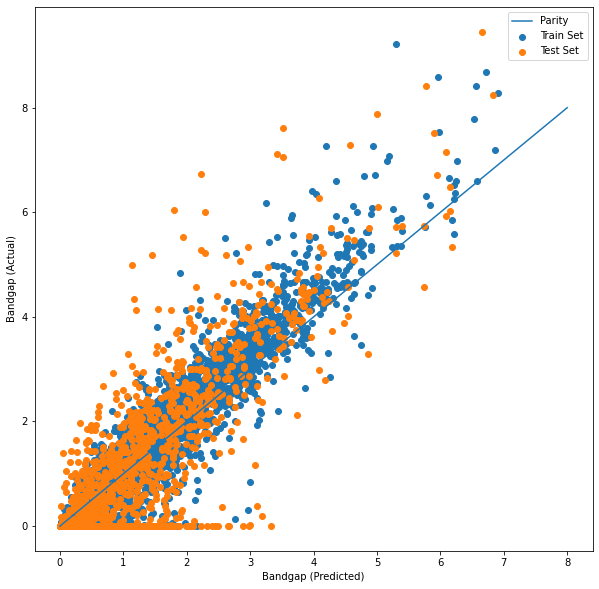

In [164]:
plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rcParams["figure.figsize"] = (10,10)

plt.scatter(x=train_y_pred, y=train_y_true, label="Train Set")
plt.scatter(x=test_y_pred, y=test_y_true, label="Test Set")
plt.plot([0,8], [0,8], label="Parity")
plt.ylabel("Bandgap (Actual)")
plt.xlabel("Bandgap (Predicted)")
plt.legend()

In [165]:
tree=model.fitted_pipeline_[0]

In [309]:
importances = list(zip(tree.feature_importances_, data_train.drop(columns=[target]).columns))

In [310]:
for i,j in sorted(importances, key=lambda i: -i[0]):
    print(i,j)

0.03696556424286423 max:electron_negativity
0.03329333862053451 max:en_pauling
0.026410545827044492 max:first_ion_en
0.02483887888724723 min:boiling_point
0.0243749908393295 min:gs_energy
0.02081514846759143 ewald_energy_per_atom
0.016067967613410353 min:num_unfilled
0.015963541982106377 max:en_allen
0.015056329105621378 min:vdw_radius_mm3
0.014715191990750845 min:vdw_radius_alvarez
0.014665047954169832 ave:density
0.014027447298705918 max:en_ghosh
0.013729876987852283 var:en_pauling
0.013318964983199044 ave:boiling_point
0.013278425293659716 ave:gs_energy
0.013110639480110355 max:thermal_conductivity
0.01295726473632604 ave:melting_point
0.012535912972700364 max:mendeleev_number
0.012489543509701573 global_instability
0.012177315124069452 ave:num_unfilled
0.011790777671880913 perimeter_area_ratio
0.011648784708105354 max:bulk_modulus
0.01070677265693227 ave:num_p_valence
0.010295972325979025 ave:vdw_radius_alvarez
0.009139718869731351 ave:first_ion_en
0.008986307375873385 ave:evaporat

In [304]:
sisso_fun = (
    ("Rung1_1Term", lambda df: -5.446832075317974e-01 + 1.523419105194092e-01 * (df["min:gs_energy"] + df["max:en_allen"])),
    ("Rung1_2Term", lambda df: 4.094491794919684e+00 + -1.023239993380321e-01 * (df["ave:covalent_radius_cordero"] / df["ave:gs_est_bcc_latcnt"]) + 8.702895980630683e+02 * (df["var:en_pauling"] / df["ave:boiling_point"]))
)

for dataframe in (data_train, data_test):
    for name, fun in sisso_fun:
        dataframe[name] = fun(dataframe)

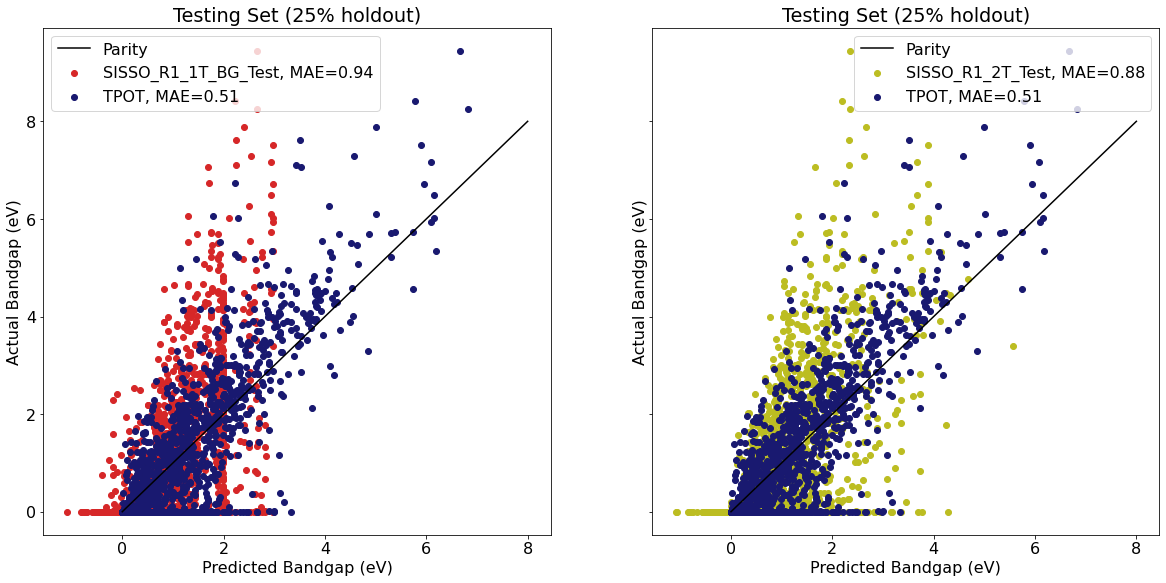

In [406]:
plt.rcParams["font.size"] = 16

tpot_mae =  np.round(sklearn.metrics.mean_absolute_error(y_true=test_y_true, y_pred=test_y_pred), 2)
r1_1t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=test_y_true, y_pred=data_test[sisso_fun[0][0]]),2)
r1_2t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=test_y_true, y_pred=data_test[sisso_fun[1][0]]),2)


fig, (ax1, ax2) = plt.subplots(1,2, sharex=True, sharey=True)
ax1.scatter(y=data_test["bandgap (eV)"],  x=data_test[sisso_fun[0][0]], marker="o",   color="tab:red", label=f"SISSO_R1_1T_BG_Test, MAE={r1_1t_mae}")
ax2.scatter(y=data_test["bandgap (eV)"],  x=data_test[sisso_fun[1][0]], marker="o",   color="tab:olive",label=f"SISSO_R1_2T_Test, MAE={r1_2t_mae}")

for ax in (ax1, ax2):
    ax.set_box_aspect(1)
    ax.plot([0,8], [0,8], c="black", label="Parity")
    ax.scatter(x=test_y_pred, y=test_y_true, color="midnightblue", label=f"TPOT, MAE={tpot_mae}")
    ax.legend()
    ax.set_xlabel("Predicted Bandgap (eV)")
    ax.set_ylabel("Actual Bandgap (eV)")
    ax.set_title("Testing Set (25% holdout)")
fig.set_size_inches(20,20)

In [384]:
subset_features = [
                   "structural complexity per atom",
                   "structural complexity per cell",
                   "n_symmetry_ops",
                   "global_instability",
                   "bond_length_average",
                   "bond_angle_average",
                   "average_cn",
                   "perimeter_area_ratio",
                   "slab_thickness",
                   "bandgap (eV)"]
for count, (i,j) in enumerate(sorted(importances, key=lambda i: -i[0])):
    if count == 10:
        break
    subset_features.append(j)
higher_train = data_train[subset_features]
higher_test = data_test[subset_features]
higher_train.to_csv("higher_bg_train.csv")
higher_test.to_csv("higher_bg_test.csv")

In [435]:
higher_sisso_fun = (
    ("Rung1_1Term", lambda df: -5.694579741645713e-01 + 1.558078357170703e-01 * (df["max:en_allen"] + df["min:gs_energy"])),
    ("Rung1_2Term", lambda df: -1.033777408625130e+00 + 2.081460140480539e-01 * (df["max:en_pauling"] / df["perimeter_area_ratio"]) + 1.263751433179756e-01 * (df["max:en_allen"] + df["min:gs_energy"])),
    ("Rung2_1Term", lambda df: -1.256606521939596e+00 + -9.068477655636401e-01 * ((df["max:en_pauling"] / df["min:gs_energy"]) - (abs(df["max:en_pauling"] - df["perimeter_area_ratio"])))),
    ("Rung2_2Term", lambda df: -5.538612447174948e-01 + -3.982366078899126e+00 * ((df["ewald_energy_per_atom"] / df["min:boiling_point"]) / (df["perimeter_area_ratio"] + df["average_cn"])) + -5.802291194183285e+00 * ((abs(df["max:en_pauling"] - df["perimeter_area_ratio"])) / (df["min:gs_energy"] - df["bond_length_average"])))
)

for dataframe in (higher_train, higher_test):
    for name, fun in higher_sisso_fun:
        print(name)
        dataframe[name] = fun(dataframe)

Rung1_1Term
Rung1_2Term
Rung2_1Term
Rung2_2Term
Rung1_1Term
Rung1_2Term
Rung2_1Term
Rung2_2Term


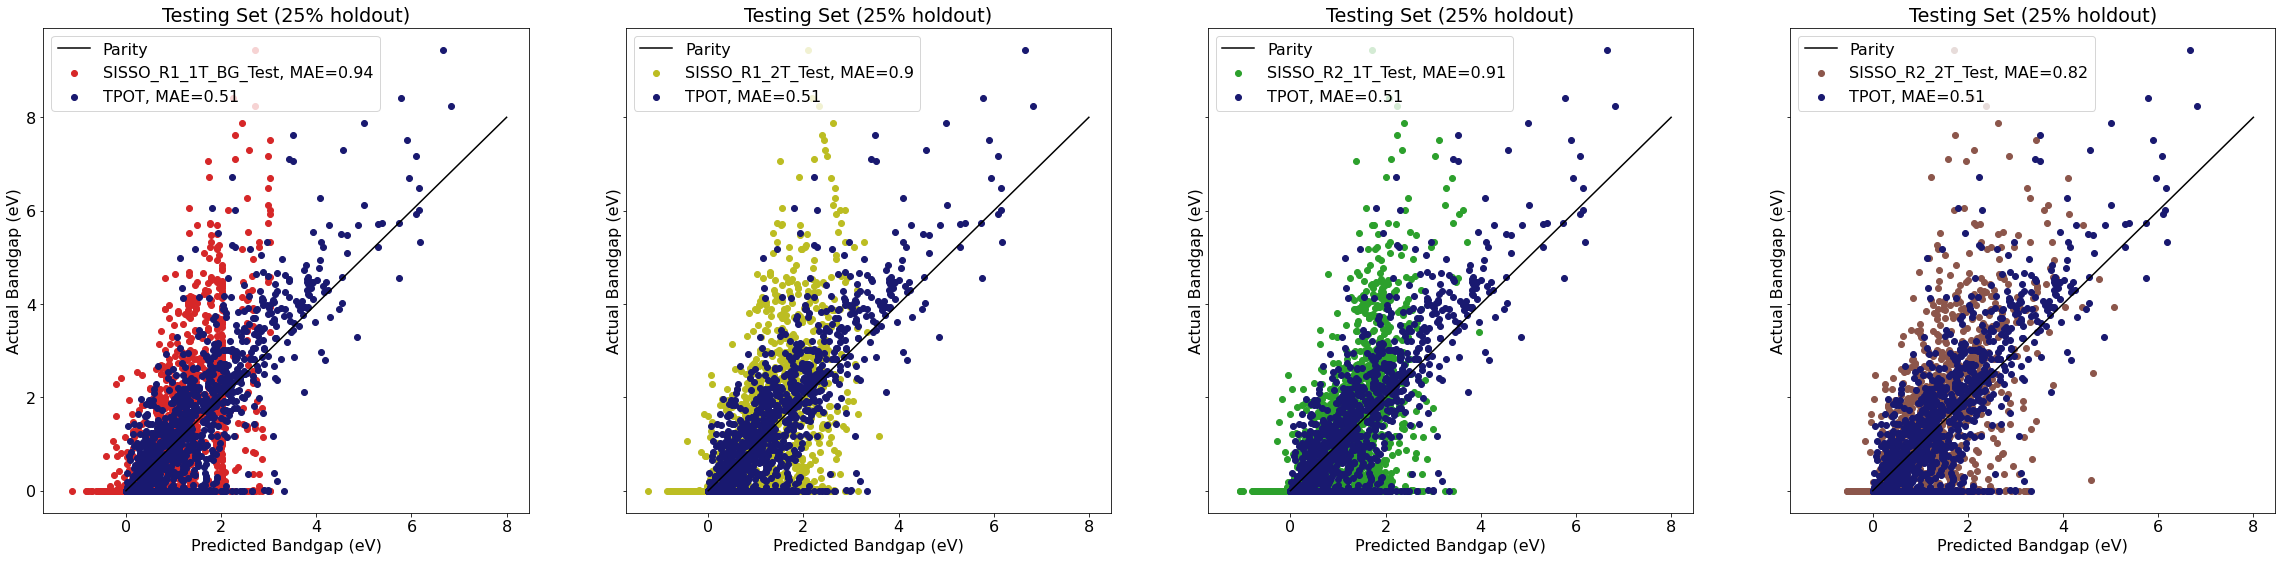

In [437]:
plt.rcParams["font.size"] = 16

tpot_mae =  np.round(sklearn.metrics.mean_absolute_error(y_true=test_y_true, y_pred=test_y_pred), 2)
r1_1t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=test_y_true, y_pred=higher_test[higher_sisso_fun[0][0]]),2)
r1_2t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=test_y_true, y_pred=higher_test[higher_sisso_fun[1][0]]),2)
r2_1t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=test_y_true, y_pred=higher_test[higher_sisso_fun[2][0]]),2)
r2_2t_mae = np.round(sklearn.metrics.mean_absolute_error(y_true=test_y_true, y_pred=higher_test[higher_sisso_fun[3][0]]),2)



fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, sharex=True, sharey=True)
ax1.scatter(y=data_test["bandgap (eV)"],  x=higher_test[higher_sisso_fun[0][0]], marker="o",   color="tab:red",  label=f"SISSO_R1_1T_BG_Test, MAE={r1_1t_mae}")
ax2.scatter(y=data_test["bandgap (eV)"],  x=higher_test[higher_sisso_fun[1][0]], marker="o",   color="tab:olive",label=f"SISSO_R1_2T_Test, MAE={r1_2t_mae}")
ax3.scatter(y=data_test["bandgap (eV)"],  x=higher_test[higher_sisso_fun[2][0]], marker="o",   color="tab:green",label=f"SISSO_R2_1T_Test, MAE={r2_1t_mae}")
ax4.scatter(y=data_test["bandgap (eV)"],  x=higher_test[higher_sisso_fun[3][0]], marker="o",   color="tab:brown",label=f"SISSO_R2_2T_Test, MAE={r2_2t_mae}")


for ax in (ax1, ax2, ax3, ax4):
    ax.set_box_aspect(1)
    ax.plot([0,8], [0,8], c="black", label="Parity")
    ax.scatter(x=test_y_pred, y=test_y_true, color="midnightblue", label=f"TPOT, MAE={tpot_mae}")
    ax.legend()
    ax.set_xlabel("Predicted Bandgap (eV)")
    ax.set_ylabel("Actual Bandgap (eV)")
    ax.set_title("Testing Set (25% holdout)")
fig.set_size_inches(40,20)